In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import kmapper as km
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from scipy.stats import iqr
import networkx as nx


In [5]:
df_departures = pd.read_pickle("../../calculated_distances_dep.pkl")

df_arrivals = pd.read_pickle("../../calculated_distances_arr.pkl")

print("Columns all:")
print(df_departures.columns.tolist())

Columns all:
['airportCode', 'date', 'deviation', 'delay']


In [6]:
df_dep_by_airport = df_departures.groupby(['date']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()

df_dep_by_airport.columns = ['date',
                            'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                            'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_arr_by_airport = df_arrivals.groupby(['date']).agg({
    'deviation': ['mean', 'median', 'std', iqr],
    'delay': ['mean', 'median', 'std', iqr]
}).reset_index()


df_arr_by_airport.columns = ['date',
                            'deviation_mean', 'deviation_median', 'deviation_std', 'deviation_iqr',
                            'delay_mean', 'delay_median', 'delay_std', 'delay_iqr']

df_all_by_airport = pd.merge(df_dep_by_airport, df_arr_by_airport, on=['date'], suffixes=('_dep', '_arr'))



print(df_all_by_airport.head())

print(df_all_by_airport.shape)

        date  deviation_mean_dep  deviation_median_dep  deviation_std_dep  \
0 2018-03-25         2093.130804           1552.265659        2029.447664   
1 2018-03-26         2043.516179           1493.752465        1994.847050   
2 2018-03-27         2094.621698           1629.927809        1910.830309   
3 2018-03-28         2077.468025           1641.644842        1922.703276   
4 2018-03-29         2064.111048           1630.822371        1823.431705   

   deviation_iqr_dep  delay_mean_dep  delay_median_dep  delay_std_dep  \
0        2246.019631       -1.631698         -1.233333       7.596806   
1        2347.497337       -0.939439         -0.583333       7.435084   
2        2443.748516       -1.109236         -0.633333       7.098443   
3        2388.800645       -1.546894         -1.166667       6.773948   
4        2362.901578       -1.486803         -1.433333       7.317037   

   delay_iqr_dep  deviation_mean_arr  deviation_median_arr  deviation_std_arr  \
0       7.554167 

In [7]:
df_dep_by_airport.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_dep_by_airport.isna().sum())

print()
df_arr_by_airport.fillna({'deviation_std': 0.0, 'delay_std': 0.0}, inplace=True)
print(df_arr_by_airport.isna().sum())


print()
df_all_by_airport.fillna({'deviation_std_dep': 0.0, 'delay_std_dep': 0.0, 'deviation_std_arr': 0.0, 'delay_std_arr': 0.0}, inplace=True)
print(df_all_by_airport.isna().sum())

date                0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

date                0
deviation_mean      0
deviation_median    0
deviation_std       0
deviation_iqr       0
delay_mean          0
delay_median        0
delay_std           0
delay_iqr           0
dtype: int64

date                    0
deviation_mean_dep      0
deviation_median_dep    0
deviation_std_dep       0
deviation_iqr_dep       0
delay_mean_dep          0
delay_median_dep        0
delay_std_dep           0
delay_iqr_dep           0
deviation_mean_arr      0
deviation_median_arr    0
deviation_std_arr       0
deviation_iqr_arr       0
delay_mean_arr          0
delay_median_arr        0
delay_std_arr           0
delay_iqr_arr           0
dtype: int64


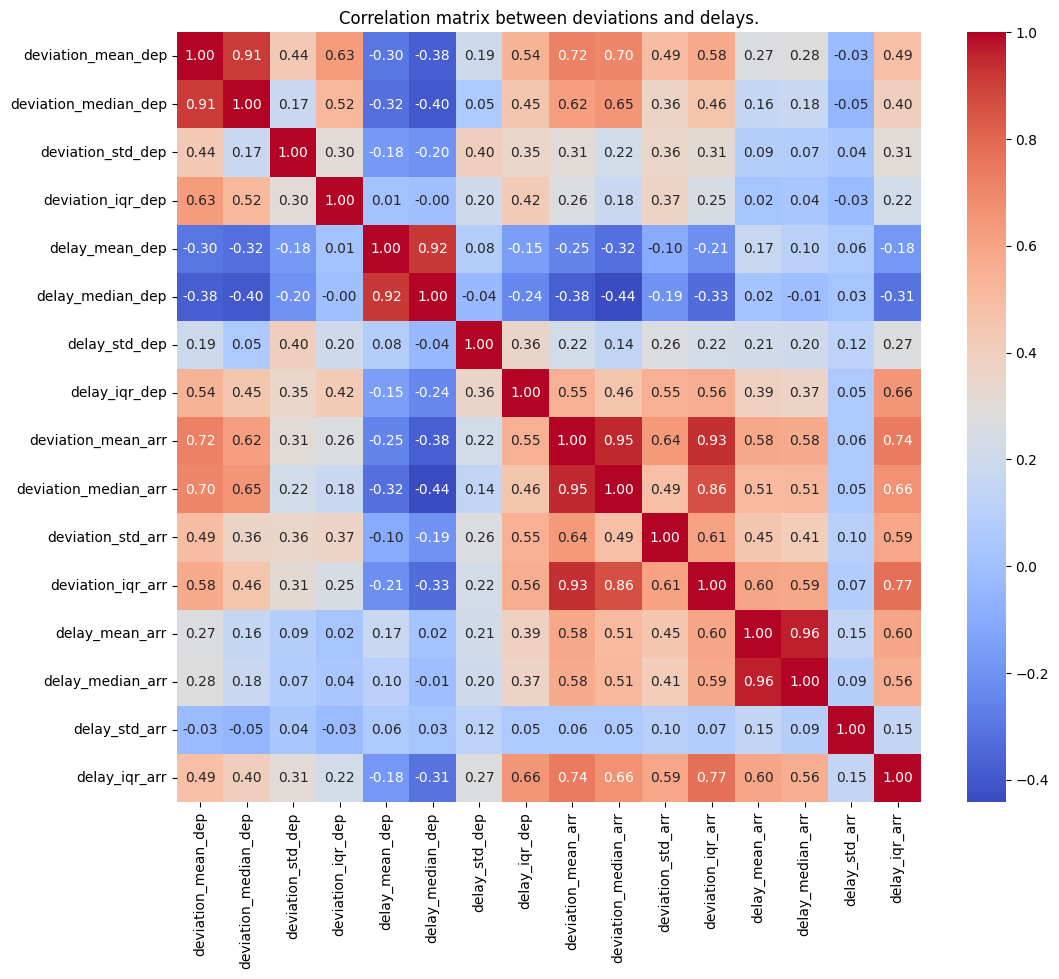

In [8]:
df_numeric = df_all_by_airport.drop(columns=['date'])

corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation matrix between deviations and delays.")
plt.show()

In [9]:
X_dep = df_dep_by_airport.drop(columns=['date']).dropna()

print(X_dep.head())
print()

scaler = StandardScaler()
X_scaled_dep = scaler.fit_transform(X_dep)

df_spanish_airports = pd.read_pickle('../../spanish_airports.pkl')

custom_tooltips_dep = np.array([
    f"{row['date']}" for _, row in df_dep_by_airport.iterrows()
])


print(X_scaled_dep)

   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     2093.130804       1552.265659    2029.447664    2246.019631   -1.631698   
1     2043.516179       1493.752465    1994.847050    2347.497337   -0.939439   
2     2094.621698       1629.927809    1910.830309    2443.748516   -1.109236   
3     2077.468025       1641.644842    1922.703276    2388.800645   -1.546894   
4     2064.111048       1630.822371    1823.431705    2362.901578   -1.486803   

   delay_median  delay_std  delay_iqr  
0     -1.233333   7.596806   7.554167  
1     -0.583333   7.435084   7.700000  
2     -0.633333   7.098443   7.566667  
3     -1.166667   6.773948   7.850000  
4     -1.433333   7.317037   7.800000  

[[-1.56607360e-01 -9.69428421e-01  7.30756273e-01 ... -8.84154613e-02
   8.63641110e-01  3.66310861e-01]
 [-6.28572339e-01 -1.46193286e+00  5.15791614e-01 ...  1.81072172e+00
   5.76709962e-01  7.99799642e-01]
 [-1.42425059e-01 -3.15747581e-01 -6.18263841e-03 ...  1.66463

In [10]:
X_arr = df_arr_by_airport.drop(columns=['date']).dropna()

print(X_arr.head())
print()

scaler = StandardScaler()
X_scaled_arr = scaler.fit_transform(X_arr)

custom_tooltips_arr = np.array([
     f"{row['date']}" for _, row in df_arr_by_airport.iterrows()
])

print(X_scaled_arr)


   deviation_mean  deviation_median  deviation_std  deviation_iqr  delay_mean  \
0     1801.134645       1334.927668    1668.991551    1964.036727   -0.009058   
1     1633.502363       1167.339714    1717.672029    1678.839914   -1.409573   
2     1747.702286       1214.180082    1726.272780    1940.950325   -1.623407   
3     1731.165281       1219.674440    1757.239184    1894.515937   -0.431192   
4     1776.107575       1261.665088    2069.664500    1872.321084   -0.113810   

   delay_median  delay_std  delay_iqr  
0     -0.116667   6.268245   7.233333  
1     -1.383333   6.331399   6.883333  
2     -1.366667   6.177746   6.820833  
3     -0.450000   6.186199   6.666667  
4     -0.266667   8.220040   7.058333  

[[-6.04028195e-02 -1.70994511e-01 -2.23241303e-01 ...  2.11410710e-01
  -3.42373695e-01  7.85471160e-01]
 [-9.81275238e-01 -1.29230853e+00 -1.02055221e-03 ... -2.16283881e+00
  -3.02108986e-01 -7.09964062e-02]
 [-3.53928535e-01 -9.78904372e-01  3.82408813e-02 ... -2.13159

In [11]:
X_all = df_all_by_airport.drop(columns=['date']).dropna()

print(X_all.head())
print()

scaler = StandardScaler()
X_scaled_all = scaler.fit_transform(X_all)

custom_tooltips_all = np.array([
     f"{row['date']}" for _, row in df_all_by_airport.iterrows()
])

print(X_scaled_all)

   deviation_mean_dep  deviation_median_dep  deviation_std_dep  \
0         2093.130804           1552.265659        2029.447664   
1         2043.516179           1493.752465        1994.847050   
2         2094.621698           1629.927809        1910.830309   
3         2077.468025           1641.644842        1922.703276   
4         2064.111048           1630.822371        1823.431705   

   deviation_iqr_dep  delay_mean_dep  delay_median_dep  delay_std_dep  \
0        2246.019631       -1.631698         -1.233333       7.596806   
1        2347.497337       -0.939439         -0.583333       7.435084   
2        2443.748516       -1.109236         -0.633333       7.098443   
3        2388.800645       -1.546894         -1.166667       6.773948   
4        2362.901578       -1.486803         -1.433333       7.317037   

   delay_iqr_dep  deviation_mean_arr  deviation_median_arr  deviation_std_arr  \
0       7.554167         1801.134645           1334.927668        1668.991551   
1 

In [12]:
def graph_stats(graph):
    G = nx.Graph()

    for node_id, members in graph['nodes'].items():
        nombres_miembros = [custom_tooltips_all[i] for i in members]
        G.add_node(node_id, members=nombres_miembros)

    for edge in graph['links']:
        G.add_edge(edge[0], edge[1])

    num_nodos = G.number_of_nodes()
    num_enlaces = G.number_of_edges()
    densidad = nx.density(G)
    grados = dict(G.degree())
    grado_medio = sum(grados.values()) / num_nodos if num_nodos > 0 else 0
    grado_max = max(grados.values()) if grados else 0
    grado_min = min(grados.values()) if grados else 0
    num_componentes_conectados = nx.number_connected_components(G)
    diametro = nx.diameter(G) if nx.is_connected(G) else max(nx.diameter(G.subgraph(c)) for c in nx.connected_components(G))
    coef_agrupamiento = nx.average_clustering(G)

    print("Número de nodos:", num_nodos)
    print("Número de enlaces:", num_enlaces)
    print("Densidad del grafo:", densidad)
    print("Grado medio de los nodos:", grado_medio)
    print("Grado máximo:", grado_max)
    print("Grado mínimo:", grado_min)
    print("Número de componentes conectados:", num_componentes_conectados)
    print("Diámetro del grafo:", diametro)
    print("Coeficiente medio de agrupamiento:", coef_agrupamiento)
    print()
    print("-" * 30)

    for node_id, data in G.nodes(data=True):
        if(data and data['members']):    
            members = data['members']
            cluster_size = len(members)
            print(f"Clúster: {node_id}")
            print(f" - Número de miembros: {cluster_size}")
            print(f" - Miembros: {[str(member) for member in members]}")
            print("-" * 30)

In [13]:

mapper = km.KeplerMapper()

pca = PCA(n_components=1)
filter_values_dep = pca.fit_transform(X_scaled_dep)

node_color_function_dep = filter_values_dep[:, 0]

graph_dep = mapper.map(filter_values_dep,
                    X_scaled_dep,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=7, perc_overlap=0.2)
)

color_values_dep = X_scaled_dep[:, :8]
color_function_name_dep = X_dep.columns[:8]

mapper.visualize(graph_dep, 
                 path_html="mapper_output_dep.html", 
                 custom_tooltips=custom_tooltips_dep,
                 color_values=color_values_dep,
                 color_function_name=color_function_name_dep,
                 node_color_function=["mean", "std"])

graph_stats(graph_dep)

Número de nodos: 10
Número de enlaces: 1
Densidad del grafo: 0.022222222222222223
Grado medio de los nodos: 0.2
Grado máximo: 1
Grado mínimo: 0
Número de componentes conectados: 9
Diámetro del grafo: 1
Coeficiente medio de agrupamiento: 0.0

------------------------------
Clúster: cube0_cluster0
 - Número de miembros: 6
 - Miembros: ['2018-04-10 00:00:00', '2018-04-23 00:00:00', '2018-04-26 00:00:00', '2018-05-02 00:00:00', '2018-06-14 00:00:00', '2018-06-22 00:00:00']
------------------------------
Clúster: cube0_cluster1
 - Número de miembros: 6
 - Miembros: ['2018-05-04 00:00:00', '2018-05-08 00:00:00', '2018-05-15 00:00:00', '2018-05-16 00:00:00', '2018-05-17 00:00:00', '2018-09-28 00:00:00']
------------------------------
Clúster: cube1_cluster0
 - Número de miembros: 54
 - Miembros: ['2018-04-05 00:00:00', '2018-04-10 00:00:00', '2018-04-12 00:00:00', '2018-04-17 00:00:00', '2018-04-18 00:00:00', '2018-04-20 00:00:00', '2018-04-22 00:00:00', '2018-04-23 00:00:00', '2018-04-24 00:

In [18]:
pca = PCA(n_components=1)
filter_values_arr = pca.fit_transform(X_scaled_arr)

graph_arr = mapper.map(filter_values_arr, 
                    X_scaled_arr,
                    clusterer=DBSCAN(eps=2.5, min_samples=3),
                    cover=km.Cover(n_cubes=7, perc_overlap=0.2)
)

color_values_arr = X_scaled_arr[:, :8]
color_function_name_arr = X_arr.columns[:8]

mapper.visualize(graph_arr, 
                 path_html="mapper_output_arr.html", 
                 custom_tooltips=custom_tooltips_arr, 
                 color_values=color_values_arr,
                 color_function_name=color_function_name_arr,
                 node_color_function=["mean", "std"])

graph_stats(graph_arr)

Número de nodos: 8
Número de enlaces: 1
Densidad del grafo: 0.03571428571428571
Grado medio de los nodos: 0.25
Grado máximo: 1
Grado mínimo: 0
Número de componentes conectados: 7
Diámetro del grafo: 1
Coeficiente medio de agrupamiento: 0.0

------------------------------
Clúster: cube0_cluster0
 - Número de miembros: 49
 - Miembros: ['2018-03-26 00:00:00', '2018-03-27 00:00:00', '2018-04-05 00:00:00', '2018-04-17 00:00:00', '2018-04-23 00:00:00', '2018-04-24 00:00:00', '2018-05-02 00:00:00', '2018-05-08 00:00:00', '2018-05-09 00:00:00', '2018-05-15 00:00:00', '2018-05-16 00:00:00', '2018-05-17 00:00:00', '2018-06-14 00:00:00', '2018-06-15 00:00:00', '2018-06-16 00:00:00', '2018-06-18 00:00:00', '2018-06-19 00:00:00', '2018-06-21 00:00:00', '2018-06-22 00:00:00', '2018-06-23 00:00:00', '2018-07-10 00:00:00', '2018-07-17 00:00:00', '2018-07-31 00:00:00', '2018-08-01 00:00:00', '2018-08-02 00:00:00', '2018-08-03 00:00:00', '2018-08-04 00:00:00', '2018-08-15 00:00:00', '2018-08-19 00:00:00

In [17]:
pca = PCA(n_components=1)
# pca = PCA().fit(X_scaled_all)
# print(pca.explained_variance_ratio_)
filter_values_all = pca.fit_transform(X_scaled_all)


graph_all = mapper.map(filter_values_all, 
                    X_scaled_all,
                    clusterer=DBSCAN(eps=3.5, min_samples=3),
                    cover=km.Cover(n_cubes=7, perc_overlap=0.2)
)

color_values_all = X_scaled_all[:, :16]
color_function_name_all = X_all.columns[:16]

mapper.visualize(graph_all, 
                 path_html="mapper_output_all.html", 
                 custom_tooltips=custom_tooltips_all,
                 color_values=color_values_all,
                 color_function_name=color_function_name_all,
                 node_color_function=["mean", "std"])

graph_stats(graph_all)

Número de nodos: 9
Número de enlaces: 1
Densidad del grafo: 0.027777777777777776
Grado medio de los nodos: 0.2222222222222222
Grado máximo: 1
Grado mínimo: 0
Número de componentes conectados: 8
Diámetro del grafo: 1
Coeficiente medio de agrupamiento: 0.0

------------------------------
Clúster: cube0_cluster0
 - Número de miembros: 31
 - Miembros: ['2018-04-05 00:00:00', '2018-04-17 00:00:00', '2018-04-23 00:00:00', '2018-04-24 00:00:00', '2018-04-26 00:00:00', '2018-05-02 00:00:00', '2018-05-08 00:00:00', '2018-05-15 00:00:00', '2018-05-16 00:00:00', '2018-05-17 00:00:00', '2018-06-14 00:00:00', '2018-06-15 00:00:00', '2018-06-18 00:00:00', '2018-06-19 00:00:00', '2018-06-21 00:00:00', '2018-06-22 00:00:00', '2018-07-09 00:00:00', '2018-07-17 00:00:00', '2018-08-02 00:00:00', '2018-08-03 00:00:00', '2018-08-19 00:00:00', '2018-08-20 00:00:00', '2018-08-24 00:00:00', '2018-08-26 00:00:00', '2018-08-30 00:00:00', '2018-09-13 00:00:00', '2018-09-23 00:00:00', '2018-09-28 00:00:00', '2018